# Laboratorio 4
## Esercizio 04.1
Nella simulazione di dinamica molecolare, utilizzo l'algoritmo di Verlet. Tramite questo algoritmo è possibile (a partire da una configurazione spaziale iniziale), valutare a tempi discreti l'evoluzione delle posizioni e delle velocità degli atomi considerati, mantenendo un'energia costante. L'algoritmo di Verlet parte da una configurazione iniziale al tempo $t$ valuta la configurazione al tempo $t-\delta t$ tramite l'algoritmo di Eulero:
$$r(t-\delta t)=r(t)-v(t)\delta t;$$
dopodiché calcola le posizioni con
$$r(t+\delta t)=2r(t)-r(t-\delta t)+a(t)\delta t^2$$
e le velocità con
$$v(t)=\frac{r(t+\delta t)-r(t-\delta t)}{2\delta t}.$$

Se desideriamo svolgere simulazioni ad una temperatura $T^*$, dobbiamo effettuare una prima fase di equilibrazione termodinamica, che può essere svolta utilizzando un fattore di scala sulle velocità delle particelle. Infatti, sappiamo che l'energia cinetica del sistema sarà
$$ K=\frac m2\sum_{i=1}^{3N}v_i^2=\frac32Nk_BT $$
da cui possiamo ricavare la temperatura $T$ della simulazione; se moltiplichiamo le velocità degli atomi per il fattore di scala $f_s=\sqrt{T^*/T}$ otterremo una energia cinetica
$$ K=\frac m2\sum_{i=1}^{3N}v_i^2\frac{T^*}T=\frac32Nk_BT^* $$
che corrisponde alla temperatura $T^*$ desiderata.

In questa fase di termalizzazione riscalo le velocità ogni $n_{equil\ step}=300$ step per la fase solida e liquida; per la fase gassosa ne simulo $n_{equil\ step}=1200$, viste le più elevate fluttuazioni. Nel codice ho aggiunto la possibilità di partire da una vecchia configurazione.

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

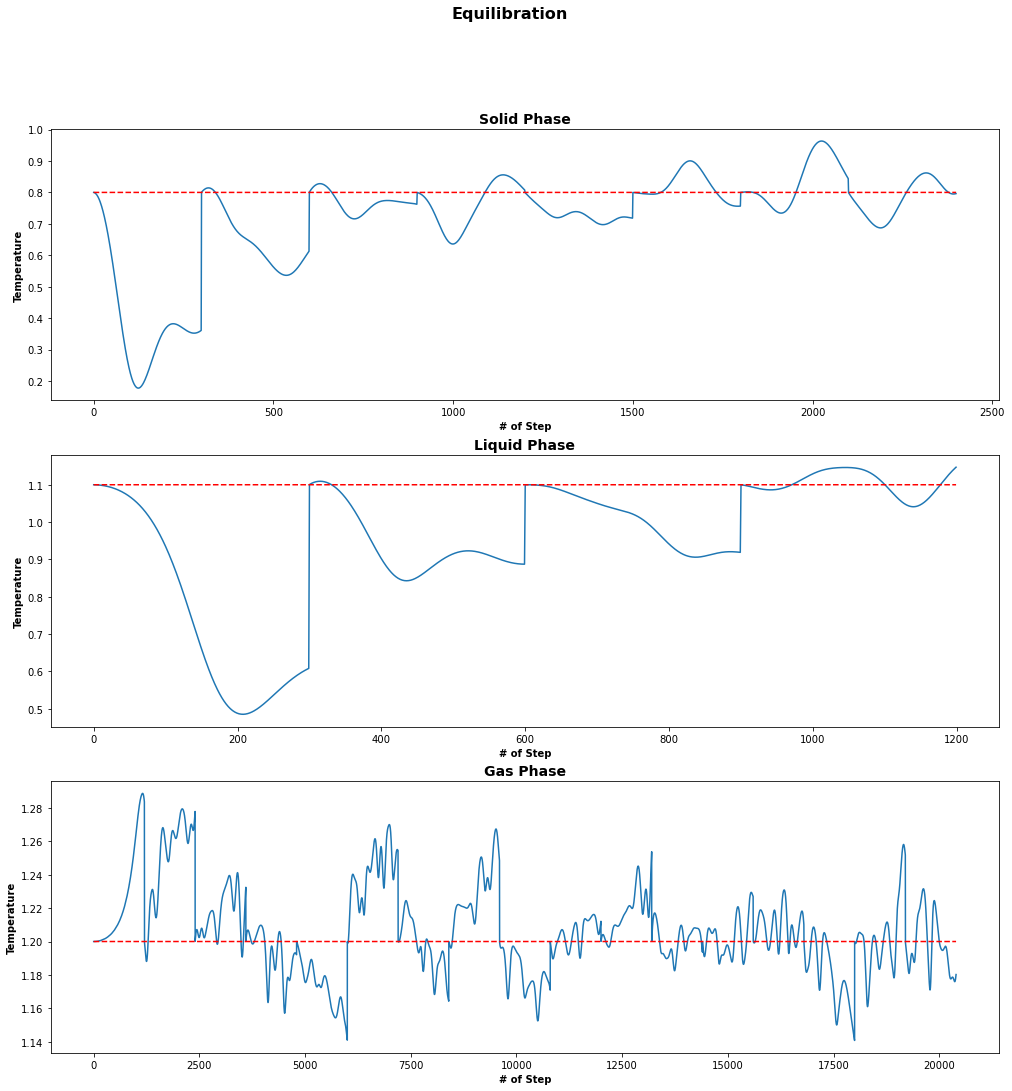

In [46]:
temp_s = np.loadtxt('solid/insta.temp.dat')
x_s = range(len(temp_s))
hld_s = np.array([0.8 for i in range(len(x_s))])
temp_l = np.loadtxt('liquid/insta.temp.dat')
x_l = range(len(temp_l))
hld_l = np.array([1.1 for i in range(len(x_l))])
temp_g = np.loadtxt('gas/insta.temp.dat')
x_g = range(len(temp_g))
hld_g = np.array([1.2 for i in range(len(x_g))])

fig = plt.figure(figsize = (17,17))

fig.suptitle("Equilibration", fontsize = 16, fontweight = "bold")
ax = fig.add_subplot(311)
ax.plot(x_s,temp_s)
ax.plot(hld_s, 'r--')

ax.set_title(r'Solid Phase',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Step', fontweight = "bold")
ax.set_ylabel(r'Temperature', fontweight = "bold")

ax = fig.add_subplot(312)
ax.plot(x_l,temp_l)
ax.plot(hld_l, 'r--')

ax.set_title(r'Liquid Phase',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Step', fontweight = "bold")
ax.set_ylabel(r'Temperature', fontweight = "bold")

ax = fig.add_subplot(313)
ax.plot(x_g,temp_g)
ax.plot(hld_g, 'r--')

ax.set_title(r'Gas Phase',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Step', fontweight = "bold")
ax.set_ylabel(r'Temperature', fontweight = "bold")

plt.show()

Si osserva come dopo qualche riscalamento della velocità il sistema tenda ad equilibrarsi alla corretta temperatura.

## 04.2 & 04.3
Svolgo ora una media a blocchi su temperatura, energia potenziale, energia cinetica, energia totale e pressione calcolate ad ogni step di Verlet: utilizzo un numero di blocchi pari a $n_{block}=100$, e simulo $n_{step}^{sol, liq}=10000$ per la fase solida e liquida e $n_{step}^{gas}=30000$ per la fase gassosa. Converto i valori trovati in unità SI, simulando molecole di Argon, caratterizzate da:
- $\sigma=0.34$ nm;
- $\epsilon/k_B=120$ K;
- $m=39.948$ amu.

In [8]:
sigma = 0.34
epsilonKB = 120
m = 39.948
KBe23 = 1.380650324

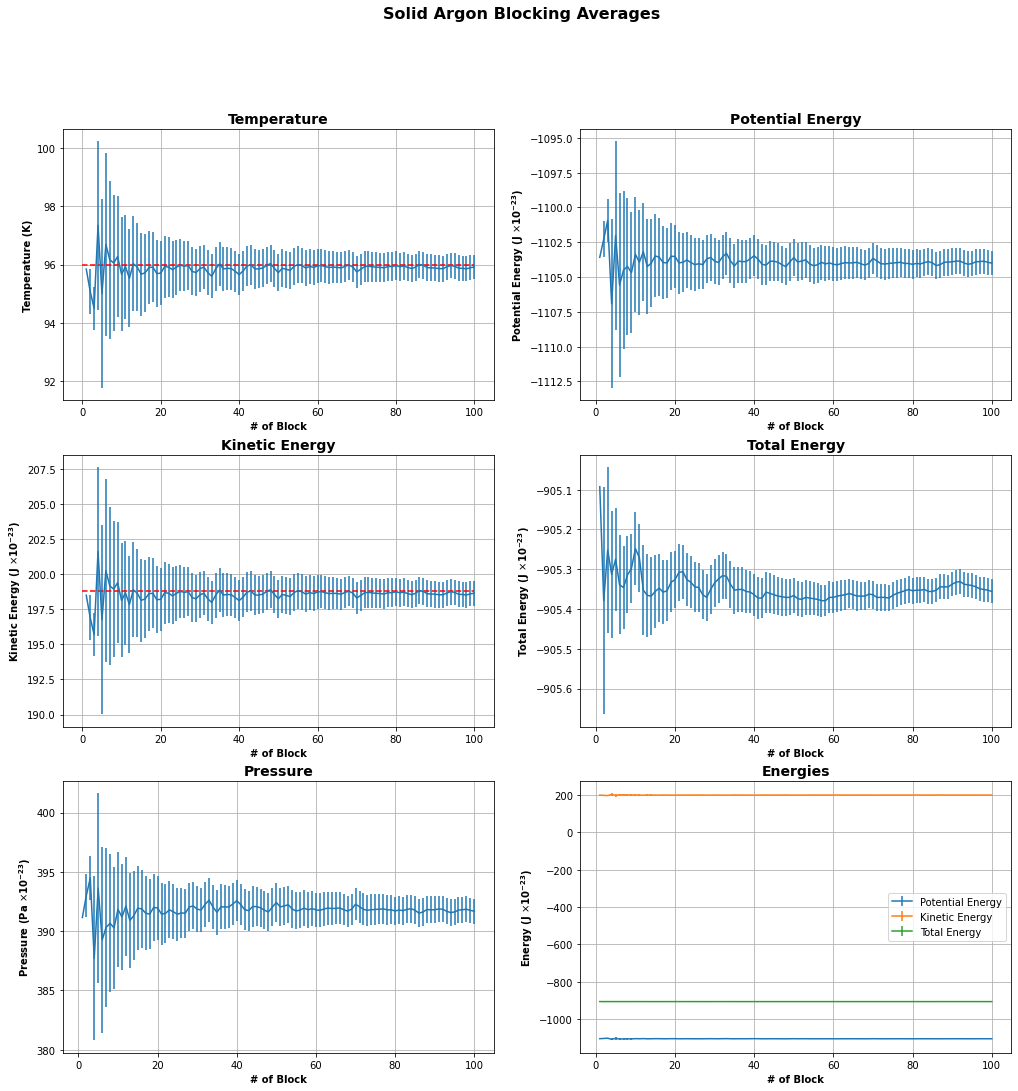

In [12]:
x_temp, inst_temp, sum_prog_temp, err_prog_temp = np.loadtxt('solid/output.temp.0', unpack = True)
x_epot, inst_epot, sum_prog_epot, err_prog_epot = np.loadtxt('solid/output.epot.0', unpack = True)
x_ekin, inst_ekin, sum_prog_ekin, err_prog_ekin = np.loadtxt('solid/output.ekin.0', unpack = True)
x_etot, inst_etot, sum_prog_etot, err_prog_etot = np.loadtxt('solid/output.etot.0', unpack = True)
x_pres, inst_pres, sum_prog_pres, err_prog_pres = np.loadtxt('solid/output.pres.0', unpack = True)

inst_temp, sum_prog_temp, err_prog_temp = inst_temp*epsilonKB, sum_prog_temp*epsilonKB, err_prog_temp*epsilonKB
inst_epot, sum_prog_epot, err_prog_epot = inst_epot*epsilonKB*KBe23, sum_prog_epot*epsilonKB*KBe23, err_prog_epot*epsilonKB*KBe23
inst_ekin, sum_prog_ekin, err_prog_ekin = inst_ekin*epsilonKB*KBe23, sum_prog_ekin*epsilonKB*KBe23, err_prog_ekin*epsilonKB*KBe23
inst_etot, sum_prog_etot, err_prog_etot = inst_etot*epsilonKB*KBe23, sum_prog_etot*epsilonKB*KBe23, err_prog_etot*epsilonKB*KBe23
inst_pres, sum_prog_pres, err_prog_pres = inst_pres*epsilonKB*sigma, sum_prog_pres*epsilonKB*sigma, err_prog_pres*epsilonKB*sigma

fig = plt.figure(figsize = (17,17))

fig.suptitle("Solid Argon Blocking Averages", fontsize = 16, fontweight = "bold")
ax = fig.add_subplot(321)
plt.errorbar(x_temp,sum_prog_temp,yerr=err_prog_temp)
hld_s = np.array([0.8*epsilonKB for i in range(len(x_temp)+1)])
ax.plot(hld_s, 'r--')

ax.set_title(r'Temperature',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Temperature (K)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(322)
plt.errorbar(x_epot,sum_prog_epot,yerr=err_prog_epot)
#hld_s = np.array([0.8 for i in range(len(x_epot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Potential Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Potential Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(323)
plt.errorbar(x_ekin,sum_prog_ekin,yerr=err_prog_ekin)
hld_s = np.array([0.8*3/2*epsilonKB*KBe23 for i in range(len(x_ekin)+1)])
ax.plot(hld_s, 'r--')

ax.set_title(r'Kinetic Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Kinetic Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(324)
plt.errorbar(x_etot,sum_prog_etot,yerr=err_prog_etot)
#hld_s = np.array([0.8 for i in range(len(x_etot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Total Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Total Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(325)
plt.errorbar(x_pres,sum_prog_pres,yerr=err_prog_pres)
#hld_s = np.array([0.8 for i in range(len(x_etot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Pressure',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Pressure (Pa $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(326)
plt.errorbar(x_epot,sum_prog_epot,yerr=err_prog_epot, label = "Potential Energy")
plt.errorbar(x_ekin,sum_prog_ekin,yerr=err_prog_ekin, label = "Kinetic Energy")
plt.errorbar(x_etot,sum_prog_etot,yerr=err_prog_etot, label = "Total Energy")

ax.set_title(r'Energies',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()
ax.legend()


plt.show()

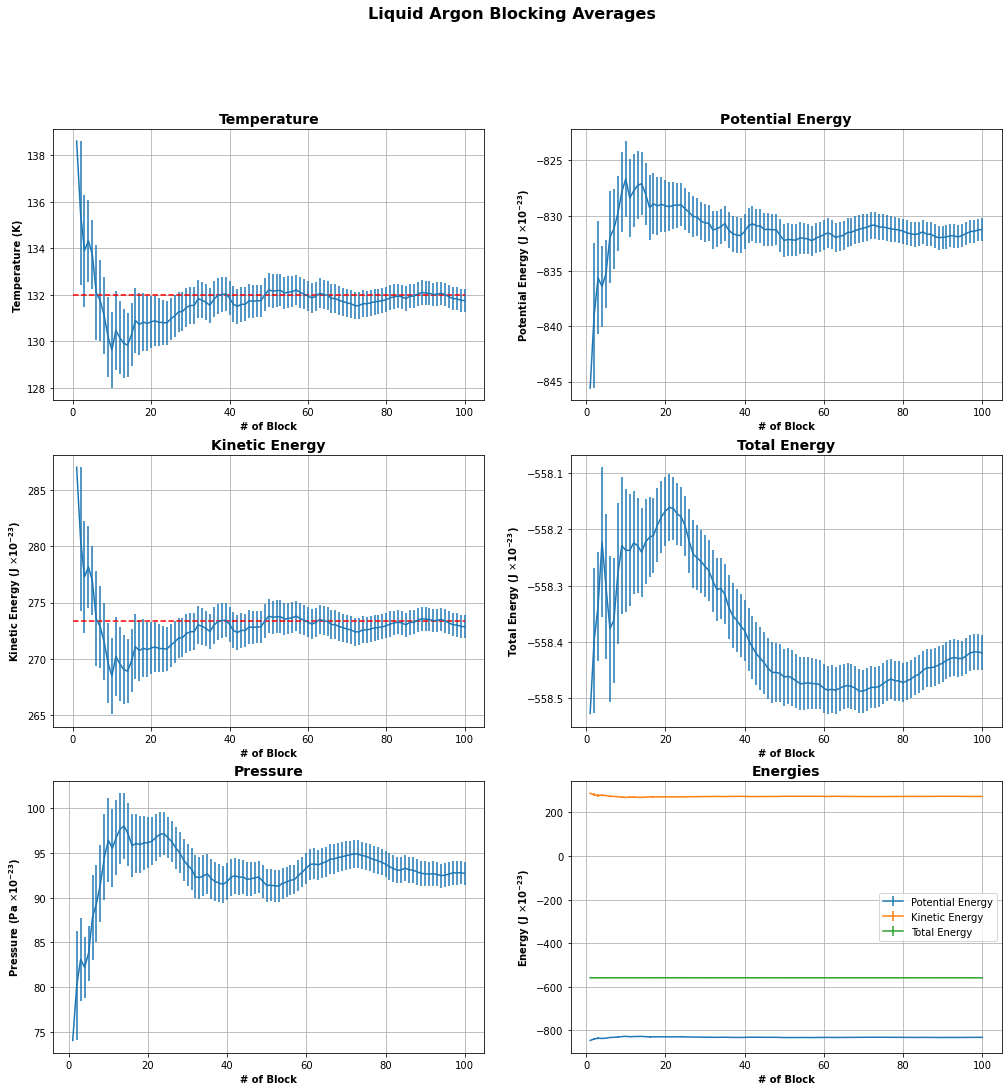

In [32]:
x_temp, inst_temp, sum_prog_temp, err_prog_temp = np.loadtxt('liquid/output.temp.0', unpack = True)
x_epot, inst_epot, sum_prog_epot, err_prog_epot = np.loadtxt('liquid/output.epot.0', unpack = True)
x_ekin, inst_ekin, sum_prog_ekin, err_prog_ekin = np.loadtxt('liquid/output.ekin.0', unpack = True)
x_etot, inst_etot, sum_prog_etot, err_prog_etot = np.loadtxt('liquid/output.etot.0', unpack = True)
x_pres, inst_pres, sum_prog_pres, err_prog_pres = np.loadtxt('liquid/output.pres.0', unpack = True)

inst_temp, sum_prog_temp, err_prog_temp = inst_temp*epsilonKB, sum_prog_temp*epsilonKB, err_prog_temp*epsilonKB
inst_epot, sum_prog_epot, err_prog_epot = inst_epot*epsilonKB*KBe23, sum_prog_epot*epsilonKB*KBe23, err_prog_epot*epsilonKB*KBe23
inst_ekin, sum_prog_ekin, err_prog_ekin = inst_ekin*epsilonKB*KBe23, sum_prog_ekin*epsilonKB*KBe23, err_prog_ekin*epsilonKB*KBe23
inst_etot, sum_prog_etot, err_prog_etot = inst_etot*epsilonKB*KBe23, sum_prog_etot*epsilonKB*KBe23, err_prog_etot*epsilonKB*KBe23
inst_pres, sum_prog_pres, err_prog_pres = inst_pres*epsilonKB*sigma, sum_prog_pres*epsilonKB*sigma, err_prog_pres*epsilonKB*sigma

fig = plt.figure(figsize = (17,17))

fig.suptitle("Liquid Argon Blocking Averages", fontsize = 16, fontweight = "bold")
ax = fig.add_subplot(321)
plt.errorbar(x_temp,sum_prog_temp,yerr=err_prog_temp)
hld_s = np.array([1.1*epsilonKB for i in range(len(x_temp)+1)])
ax.plot(hld_s, 'r--')

ax.set_title(r'Temperature',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Temperature (K)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(322)
plt.errorbar(x_epot,sum_prog_epot,yerr=err_prog_epot)
#hld_s = np.array([0.8 for i in range(len(x_epot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Potential Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Potential Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(323)
plt.errorbar(x_ekin,sum_prog_ekin,yerr=err_prog_ekin)
hld_s = np.array([1.1*3/2*epsilonKB*KBe23 for i in range(len(x_ekin)+1)])
ax.plot(hld_s, 'r--')

ax.set_title(r'Kinetic Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Kinetic Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(324)
plt.errorbar(x_etot,sum_prog_etot,yerr=err_prog_etot)
#hld_s = np.array([0.8 for i in range(len(x_etot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Total Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Total Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(325)
plt.errorbar(x_pres,sum_prog_pres,yerr=err_prog_pres)
#hld_s = np.array([0.8 for i in range(len(x_etot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Pressure',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Pressure (Pa $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(326)
plt.errorbar(x_epot,sum_prog_epot,yerr=err_prog_epot, label = "Potential Energy")
plt.errorbar(x_ekin,sum_prog_ekin,yerr=err_prog_ekin, label = "Kinetic Energy")
plt.errorbar(x_etot,sum_prog_etot,yerr=err_prog_etot, label = "Total Energy")

ax.set_title(r'Energies',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()
ax.legend()


plt.show()

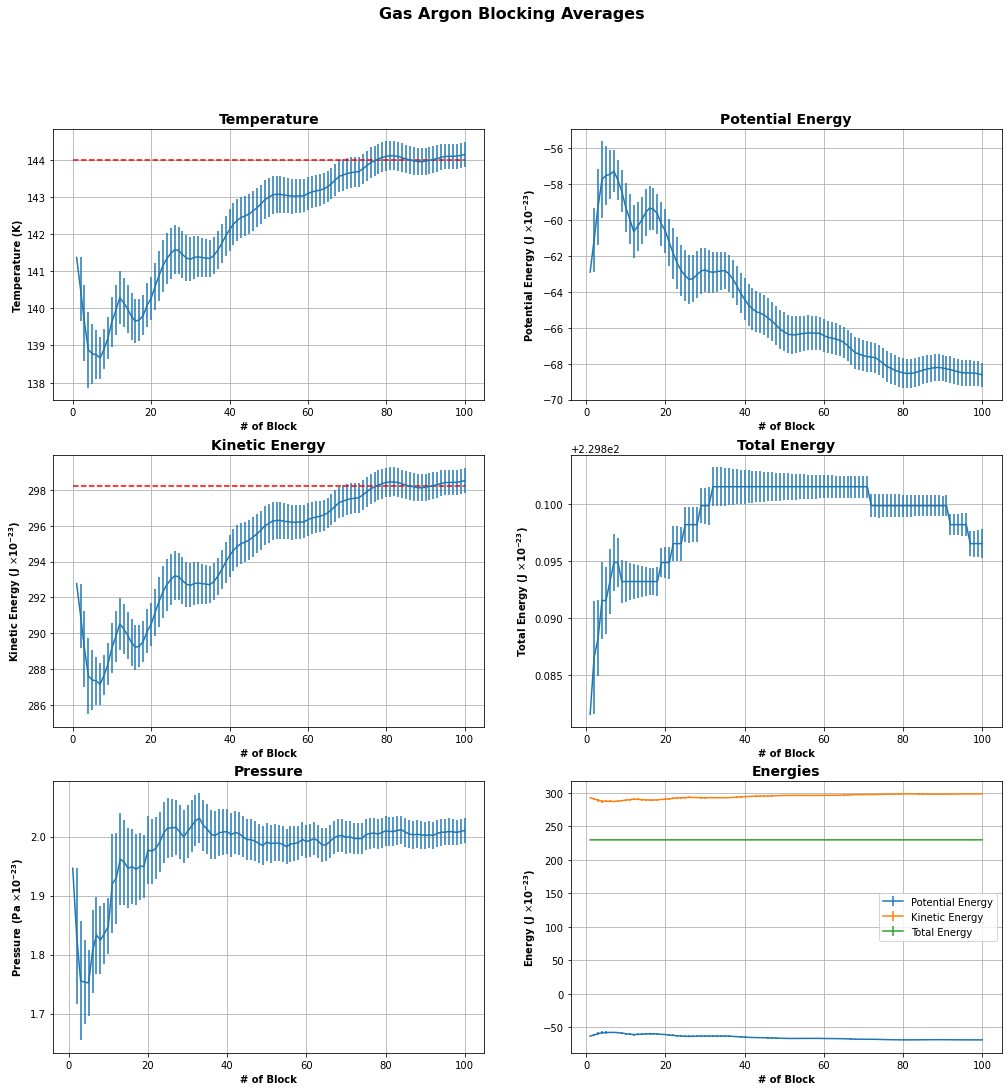

In [45]:
x_temp, inst_temp, sum_prog_temp, err_prog_temp = np.loadtxt('gas/output.temp.0', unpack = True)
x_epot, inst_epot, sum_prog_epot, err_prog_epot = np.loadtxt('gas/output.epot.0', unpack = True)
x_ekin, inst_ekin, sum_prog_ekin, err_prog_ekin = np.loadtxt('gas/output.ekin.0', unpack = True)
x_etot, inst_etot, sum_prog_etot, err_prog_etot = np.loadtxt('gas/output.etot.0', unpack = True)
x_pres, inst_pres, sum_prog_pres, err_prog_pres = np.loadtxt('gas/output.pres.0', unpack = True)

inst_temp, sum_prog_temp, err_prog_temp = inst_temp*epsilonKB, sum_prog_temp*epsilonKB, err_prog_temp*epsilonKB
inst_epot, sum_prog_epot, err_prog_epot = inst_epot*epsilonKB*KBe23, sum_prog_epot*epsilonKB*KBe23, err_prog_epot*epsilonKB*KBe23
inst_ekin, sum_prog_ekin, err_prog_ekin = inst_ekin*epsilonKB*KBe23, sum_prog_ekin*epsilonKB*KBe23, err_prog_ekin*epsilonKB*KBe23
inst_etot, sum_prog_etot, err_prog_etot = inst_etot*epsilonKB*KBe23, sum_prog_etot*epsilonKB*KBe23, err_prog_etot*epsilonKB*KBe23
inst_pres, sum_prog_pres, err_prog_pres = inst_pres*epsilonKB*sigma, sum_prog_pres*epsilonKB*sigma, err_prog_pres*epsilonKB*sigma

fig = plt.figure(figsize = (17,17))

fig.suptitle("Gas Argon Blocking Averages", fontsize = 16, fontweight = "bold")
ax = fig.add_subplot(321)
plt.errorbar(x_temp,sum_prog_temp,yerr=err_prog_temp)
hld_s = np.array([1.2*epsilonKB for i in range(len(x_temp)+1)])
ax.plot(hld_s, 'r--')

ax.set_title(r'Temperature',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Temperature (K)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(322)
plt.errorbar(x_epot,sum_prog_epot,yerr=err_prog_epot)
#hld_s = np.array([0.8 for i in range(len(x_epot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Potential Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Potential Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(323)
plt.errorbar(x_ekin,sum_prog_ekin,yerr=err_prog_ekin)
hld_s = np.array([1.2*3/2*epsilonKB*KBe23 for i in range(len(x_ekin)+1)])
ax.plot(hld_s, 'r--')

ax.set_title(r'Kinetic Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Kinetic Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(324)
plt.errorbar(x_etot,sum_prog_etot,yerr=err_prog_etot)
#hld_s = np.array([0.8 for i in range(len(x_etot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Total Energy',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Total Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(325)
plt.errorbar(x_pres,sum_prog_pres,yerr=err_prog_pres)
#hld_s = np.array([0.8 for i in range(len(x_etot))])
#ax.plot(hld_s, 'r--')

ax.set_title(r'Pressure',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Pressure (Pa $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(326)
plt.errorbar(x_epot,sum_prog_epot,yerr=err_prog_epot, label = "Potential Energy")
plt.errorbar(x_ekin,sum_prog_ekin,yerr=err_prog_ekin, label = "Kinetic Energy")
plt.errorbar(x_etot,sum_prog_etot,yerr=err_prog_etot, label = "Total Energy")

ax.set_title(r'Energies',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Energy (J $\times\mathbf{10^{-23}}$)', fontweight = "bold")
ax.grid()
ax.legend()



plt.show()

In tutti e tre i casi, dopo l'equilibrazione ho ottenuto dei risultati conformi a ciò che mi aspettavo; la condizione necessaria di energia conservata è soddisfatta, come è chiaro nell'ultimo grafico. Nel caso dell'Argon nella fase gassosa, tuttavia, ho notato un equilibrio molto più fragile, con fluttuazioni di temperatura ed energia più elevate rispetto al caso solido e liquido.